In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline


plt.rcParams["figure.figsize"] = (20,10)

def cv2_imshow(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

########################################Blob Detector##############################################

# Setup SimpleBlobDetector parameters.
blobParams = cv2.SimpleBlobDetector_Params()

# Change thresholds
blobParams.minThreshold = 30
blobParams.maxThreshold = 255

# Filter by Area.
blobParams.filterByArea = True
blobParams.minArea = 2000   # minArea may be adjusted to suit for your experiment
blobParams.maxArea = 100000   # maxArea may be adjusted to suit for your experiment

# Filter by Circularity
blobParams.filterByCircularity = True
blobParams.minCircularity = 0.4

# Filter by Convexity
blobParams.filterByConvexity = True
blobParams.minConvexity = 0.87

# Filter by Inertia
blobParams.filterByInertia = True
blobParams.minInertiaRatio = 0.01

# Create a detector with the parameters
blobDetector = cv2.SimpleBlobDetector_create(blobParams)


In [2]:
objp = np.zeros((44, 3), np.float32)
for x in range(0, 11):
    for y in range(0, 4):
        objp[4*x+y] = (x*36, y*72 + (x%2)*36, 0)


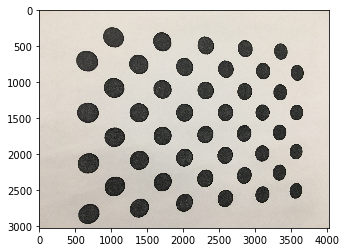

In [5]:
objpoints = None # 3d point in real world space
imgpoints = None # 2d points in image plane.

img = cv2.imread("data/IMG_6809.JPG")
cv2_imshow(img)

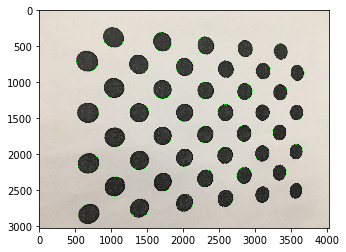

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
keypoints = blobDetector.detect(gray)
im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(im_with_keypoints)
ret, corners = cv2.findCirclesGrid(gray, (4,11),
                        flags = cv2.CALIB_CB_ASYMMETRIC_GRID + cv2.CALIB_CB_CLUSTERING,
                                     blobDetector = blobDetector)   # Find the circle grid

In [8]:

#cv2_imshow(im_with_keypoints)
#print(keypoints)
if corners is not None and ret:
    objpoints = np.array([objp]) if objpoints is None else np.append(objpoints, [objp], axis = 0)
    imgpoints = np.array([corners]) if imgpoints is None else np.append(imgpoints, [corners], axis = 0)
else:
    print("Skip IMG_6809.JPG")


print(objpoints.shape)
print(imgpoints.shape)
(i1, i2, i3, i4) = imgpoints.shape;
imgpoints = imgpoints.reshape([i1, i2, i4])
print(imgpoints.shape)
  
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print(mtx)
print(dist)

(1, 44, 3)
(1, 44, 1, 2)
(1, 44, 2)
[[4.58807569e+03 0.00000000e+00 1.99060990e+03]
 [0.00000000e+00 4.44895959e+03 1.59018173e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[ 0.1610027  -0.55448762  0.00150661  0.00266477  0.17903626]]


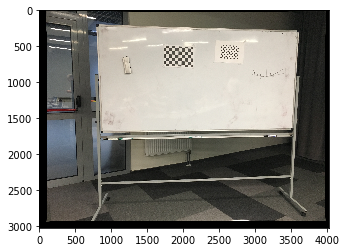

In [9]:
test = cv2.imread("data/IMG_6815.JPG")
(w,h) = test.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
dst = cv2.undistort(test, mtx, dist, None, newcameramtx)
cv2_imshow(dst)